 # Why do employees leave their jobs?

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ `X` ] YES - make available
* [  ] NO - keep private

# Overview

In this report, we use the decision tree model to analyze  IBM HR Analytics Employee Attrition & Performance dataset and predict whether employees will leave. The accuracy of our model is 82.65%. We verify our hypothesis that salary is the main driver of employee turnover in terms of job involvement, salary, and total working years.

# Names

- Noelle Sumner
- Jalani Bowman
- Yajie Li
- Jazmine Wilmore
- Isabella Zendejas

<a id='research_question'></a>
# Research Question

1. Can we use job-related information to predict whether an employee will resign?
2. Among job involvement, salary, and total working years, is salary the main driver of employee attrition?


<a id='background'></a>

## Background & Prior Work

Our project is aimed at determining whether or not salary is the primary force, among various factors, in employee attrition. We anticipated and considered that employee attrition would be influenced by other factors such as average income by region, industry, position in company, age, gender, and more financial aspects regarding daily lifestyle. 

Our research question was partially inspired by an article (1) that focused on solving problems regarding employee retention and turn-over. This project was conducted with the motivation of maintaining an efficient business approach and strategy that would anticipate when and why an employee would be likely to leave, and allow hiring managers to begin planning for replacement. This HR analytics type of approach made their research questions be mostly in search of indicators that would be preventable or salvaged by some change in management strategy. The project concluded with a predictive model that allowed companies to assess the "risk" level of employees who may leave and when the company should begin to prepare. This prompted us to want to look at something similar for our proposed project, and we began researching the ways in which we could specifically analyze whether a person with a low income would be more likely to look for a new job, among other factors. 

We looked at a previous study that was similarly motivated to find out the primary motives that would prompt a person to look for a new job. The researchers looked at the employees work environment within-company and gathered data about their educational background and experience at previous jobs. They also considered if the size of the company had a role in a person's decision to look for a new job. As reported in their notes, the study was not perfect due to the imbalance of participants and the choice to make many of the categories nominal. We found this study’s approach to be somewhat lacking due to the disregard of income in the analysis. This further inspired us to focus on the impact of salary in employee attrition.

References (include links):
- 1) "Employee Churn Model w/ Strategic Retention Plan" https://www.kaggle.com/hamzaben/employee-churn-model-w-strategic-retention-plan

- 2) "HR Analytics: Job Change of Data Scientists" https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=a

# Hypothesis


1. We can use a model with an accuracy rate of over 80% and the employee’s job-related information to predict whether an employee will leave.
2. A person with a relatively low salary in comparison to career averages will be more likely to look for a new job, regardless of other job-related factors. (such as job involvement and total working years). 

Reason: We expect that the income of a working individual will drive their decisions to stay or search for a new job because there is an increasingly common issue of jobs requiring extensive, expensive educational qualifications without adequate pay.


# Dataset(s)

- Dataset Name: IBM HR Analytics Employee Attrition & Performance
- Link to the dataset:[Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset?select=WA_Fn-UseC_-HR-Employee-Attrition.csv)
- Number of observations:1470

This dataset originally has 35 columns and provides employment information of 1470 employees. For this project, we choose 27 columns for our analysis. The dependent variable is 'Attrition' (whether the employee leave his/her job), ane the independent variables include various information such as 'Age', 'DistanceFromHome', 'JobInvolvement'.


# Setup

In [1]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

#improve resolution
%config InlineBackend.figure_format ='retina'

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)

# import machine learning packages
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# The Employee Attriton & Performance dataset from Kaggle
df = pd.read_csv('Employee.csv')


# Data Cleaning

In this section, we get a sense of what the dataset look like, drop unimportant features, check the missing values and the values of categorical features, and transform our dependent variable to binary data.

In [2]:
#check out the data

print(df.shape)
df.head(5)

(1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [3]:
# check data type
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
# describe the data
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

We only kept the columns that were of interest to us. Here we list the explaination of some features that are not straightforward.

- __Attrition__: Whether the employee leave his/her job.
- __Distance from home__: The distance from home to company (the smaller the value, the closer the distance).
- __Education__: The education level of the employee (1'Below College', 2'College', 3'Bachelor', 4'Master', 5'Doctor').
- For __EnvironmentSatisfaction, JobInvolvement, JobSatisfaction__ and __RelationshipSatisfaction__: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'.
- For __performanceRating__: 1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'.
- For __WorkLifeBalance__: 1 'Bad', 2 'Good', 3 'Better', 4 'Best'.

We decided to drop 8 columns.

- Dropped '__EmployeeCount__','__Over18__' and '__StandardHours__' because they have 0 standard deviation. They won't account for the variation of our dependent variable.

- Dropped '__HourlyRate__','__DailyRate__','__MonthlyRate__' because they have overlapped information with '__MonthlyIncome__'.

- Dropped '__EmployeeNumber__' because it's not important for our analysis.
- Dropped '__OverTime__' because the meaning of it is vague.

In [5]:
#drop unimportant features

df.drop(['EmployeeCount', 'EmployeeNumber', 'HourlyRate','DailyRate','MonthlyRate' ,'StandardHours','Over18','OverTime'], axis="columns", inplace=True)

In [6]:
# check missing values

df.isna().any() # No missing values

Age                         False
Attrition                   False
BusinessTravel              False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [7]:
# Check categorical features

print(df['BusinessTravel'].unique())
print(df['Department'].unique())
print(df['Gender'].unique())
print(df['EducationField'].unique())
print(df['JobRole'].unique())
print(df['MaritalStatus'].unique())   # No weird values

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Female' 'Male']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']


In [8]:
# Replace text with binary data

df['Attrition'].replace({'Yes': 1, 'No': 0}, inplace=True)
df['Gender'].replace({'Female': 1, 'Male':0}, inplace=True)

# Data Analysis & Results

This section has two parts. The first is data visualization and engineering. We visualize the variables and the correlations between them. Also, we deal with the outliers. In the second part, we implement the decision tree classifier to do the prediction. After that, we calculate the feature importance to see which features are most important for prediction.

### Data visualization and engineering ###

In [9]:
# Explore the dependent feature

df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

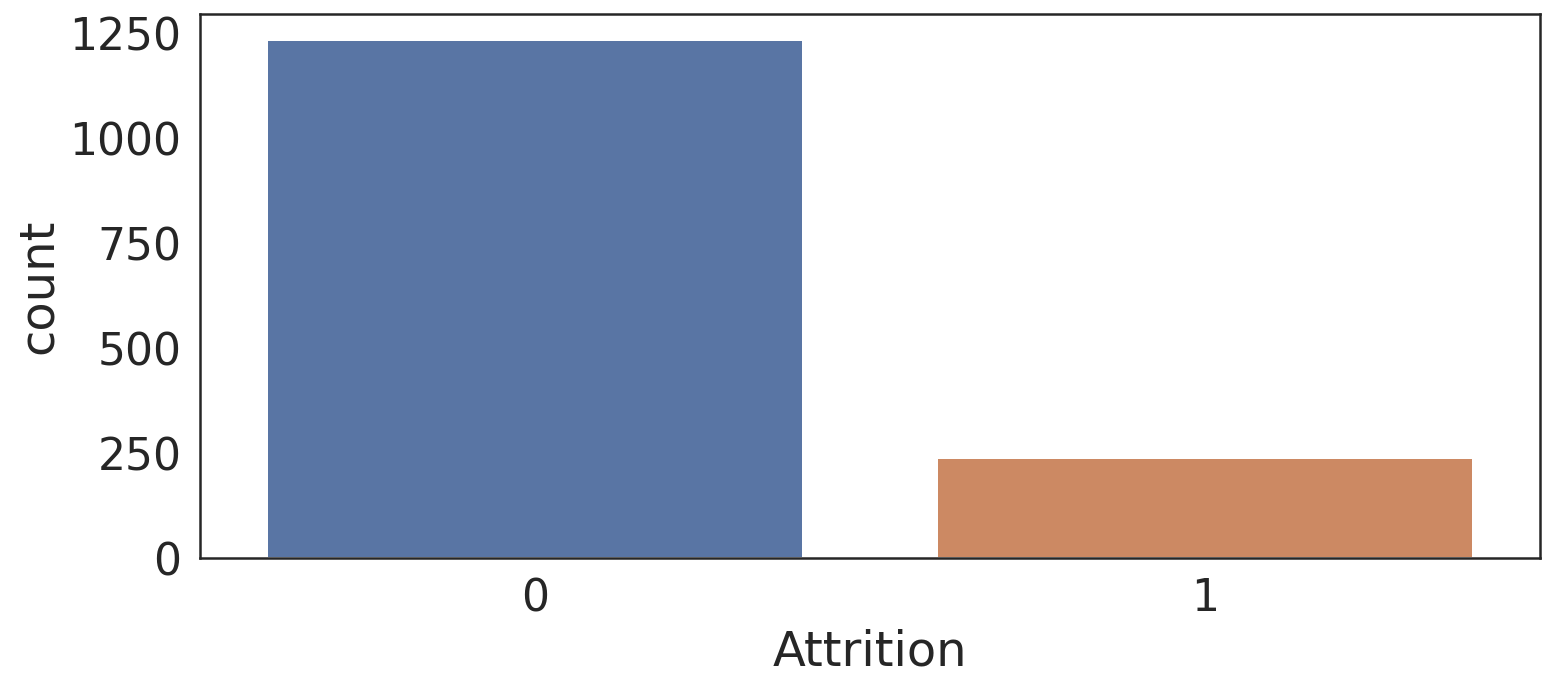

In [10]:
# Visualize the dependent feature
sns.countplot(x='Attrition', 
                   data=df)
plt.show()

# There is a significant difference between the number of people who left and those who did not leave.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>],
       [<AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot

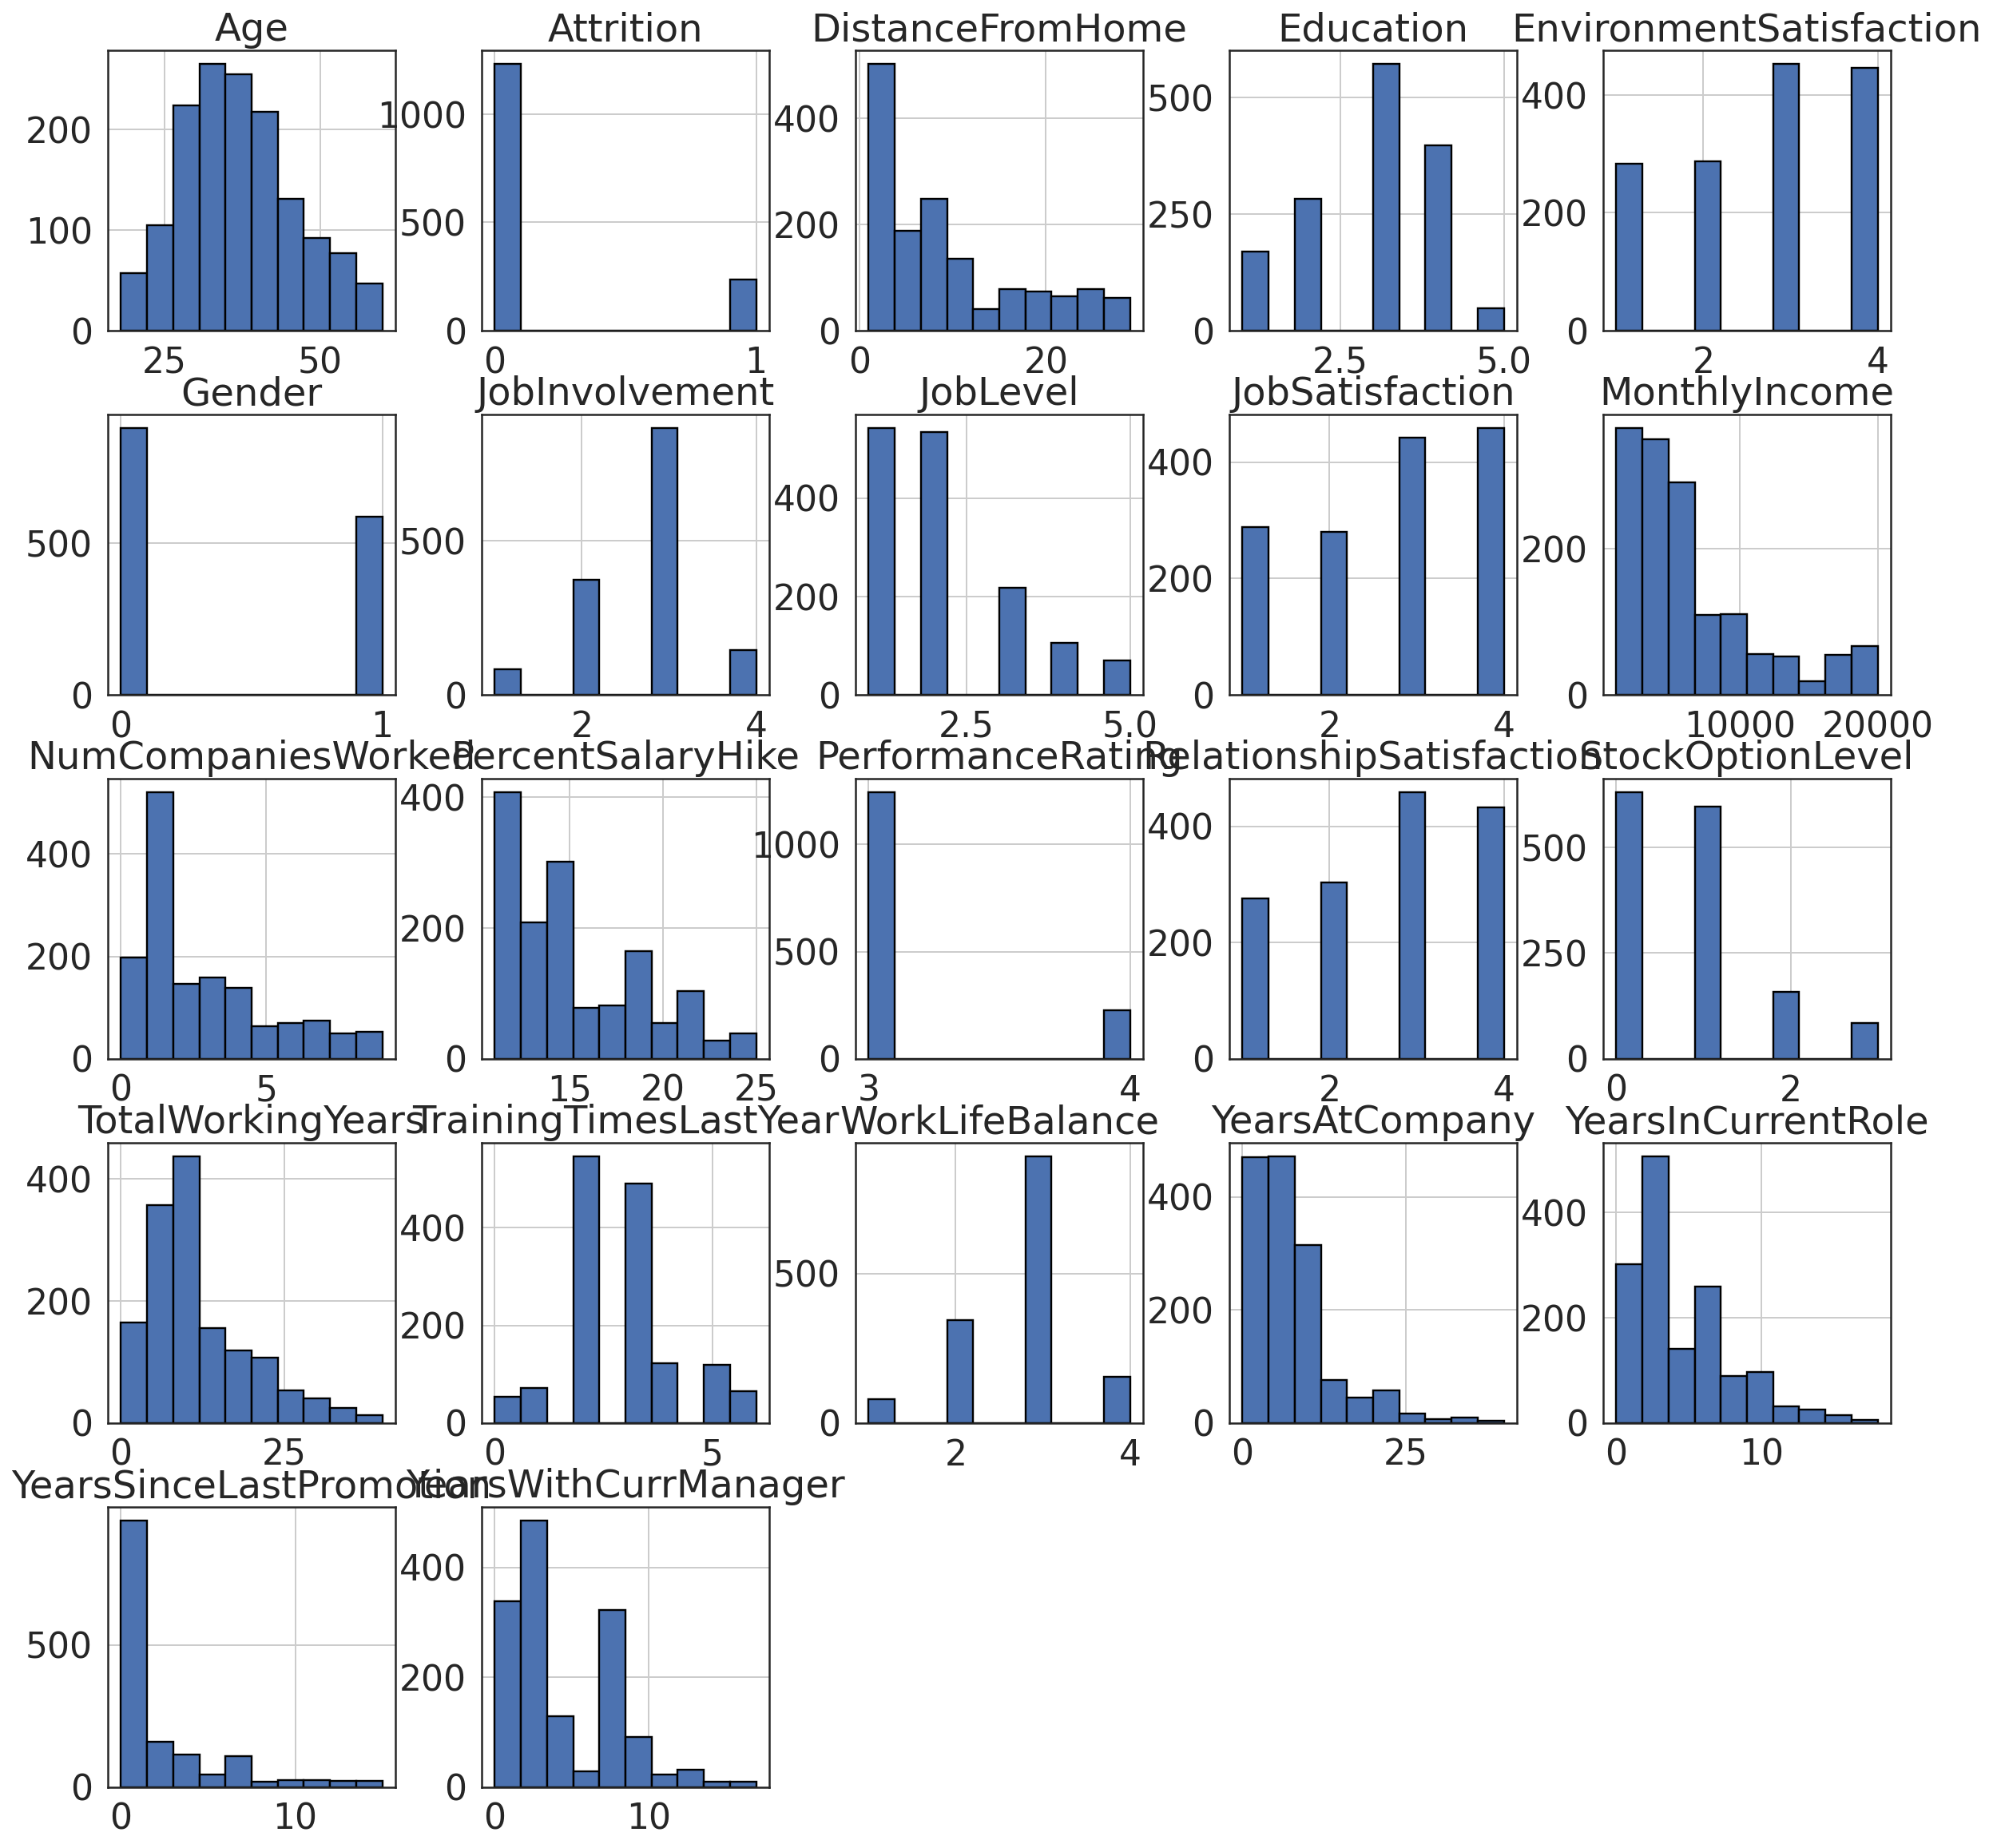

In [11]:
# Visualize the distribution of variables

df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

# From the plots, we can see the distribution of each variables. 
# Some variables have similiar distribution.for instance,'TotalWorkingYears' and 'YearsInCurrentRole'. This may imply multicollinearity.
# We can assume that variables which are not evenly distributed may be higher correlated with Attrition.

['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']


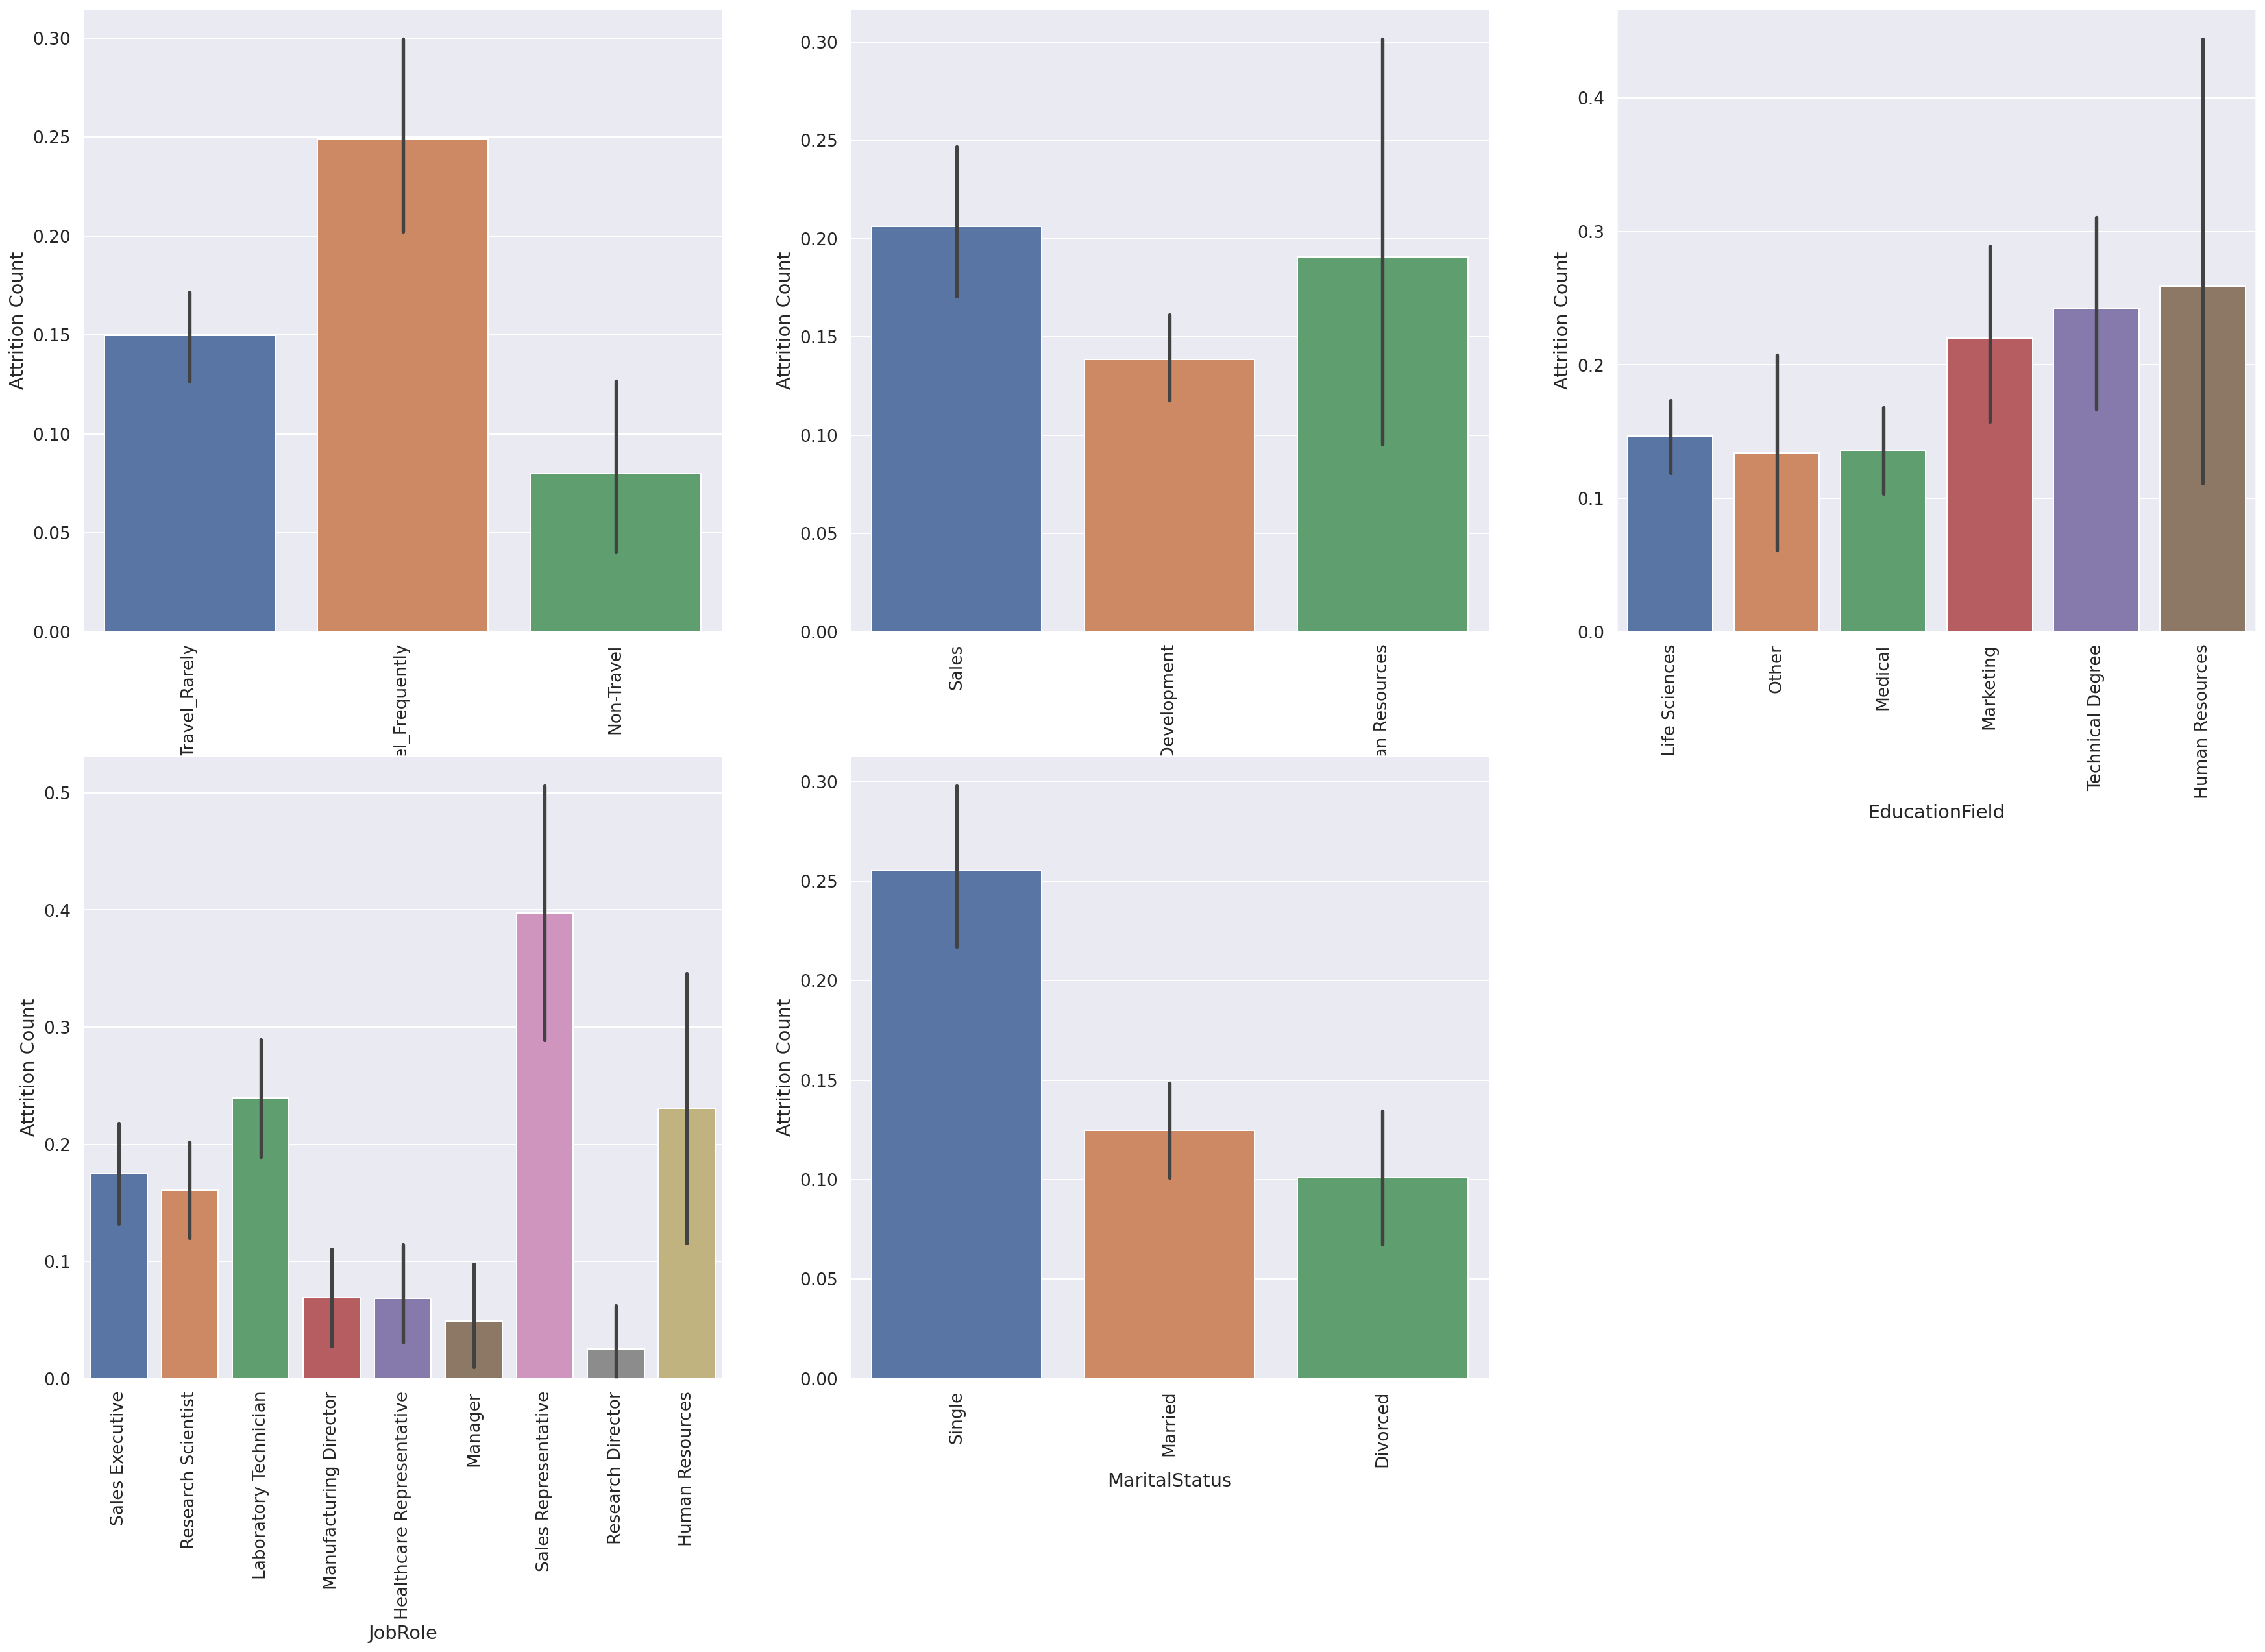

In [12]:
# Visualize the distribution of categorical features(Hue = Attrition)
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 10:
        categorical_col.append(column)
print(categorical_col)    
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

# The distribution of 'JobRole' and 'MaritalStatus' have greater variance, which may imply they have larger impact on Attrition.
# For 'BusinessTravel', people who travel frequently are more likely to leave their jobs.
# For 'Department', people who are in sales department are more likely to resign.
# For 'EducationField', people who studied human resources are more likely to resign.
# For 'JobRole', people who are sales representative are more likely to leave.
# For 'MaritalStatus', people who are single are more likely to resign.

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


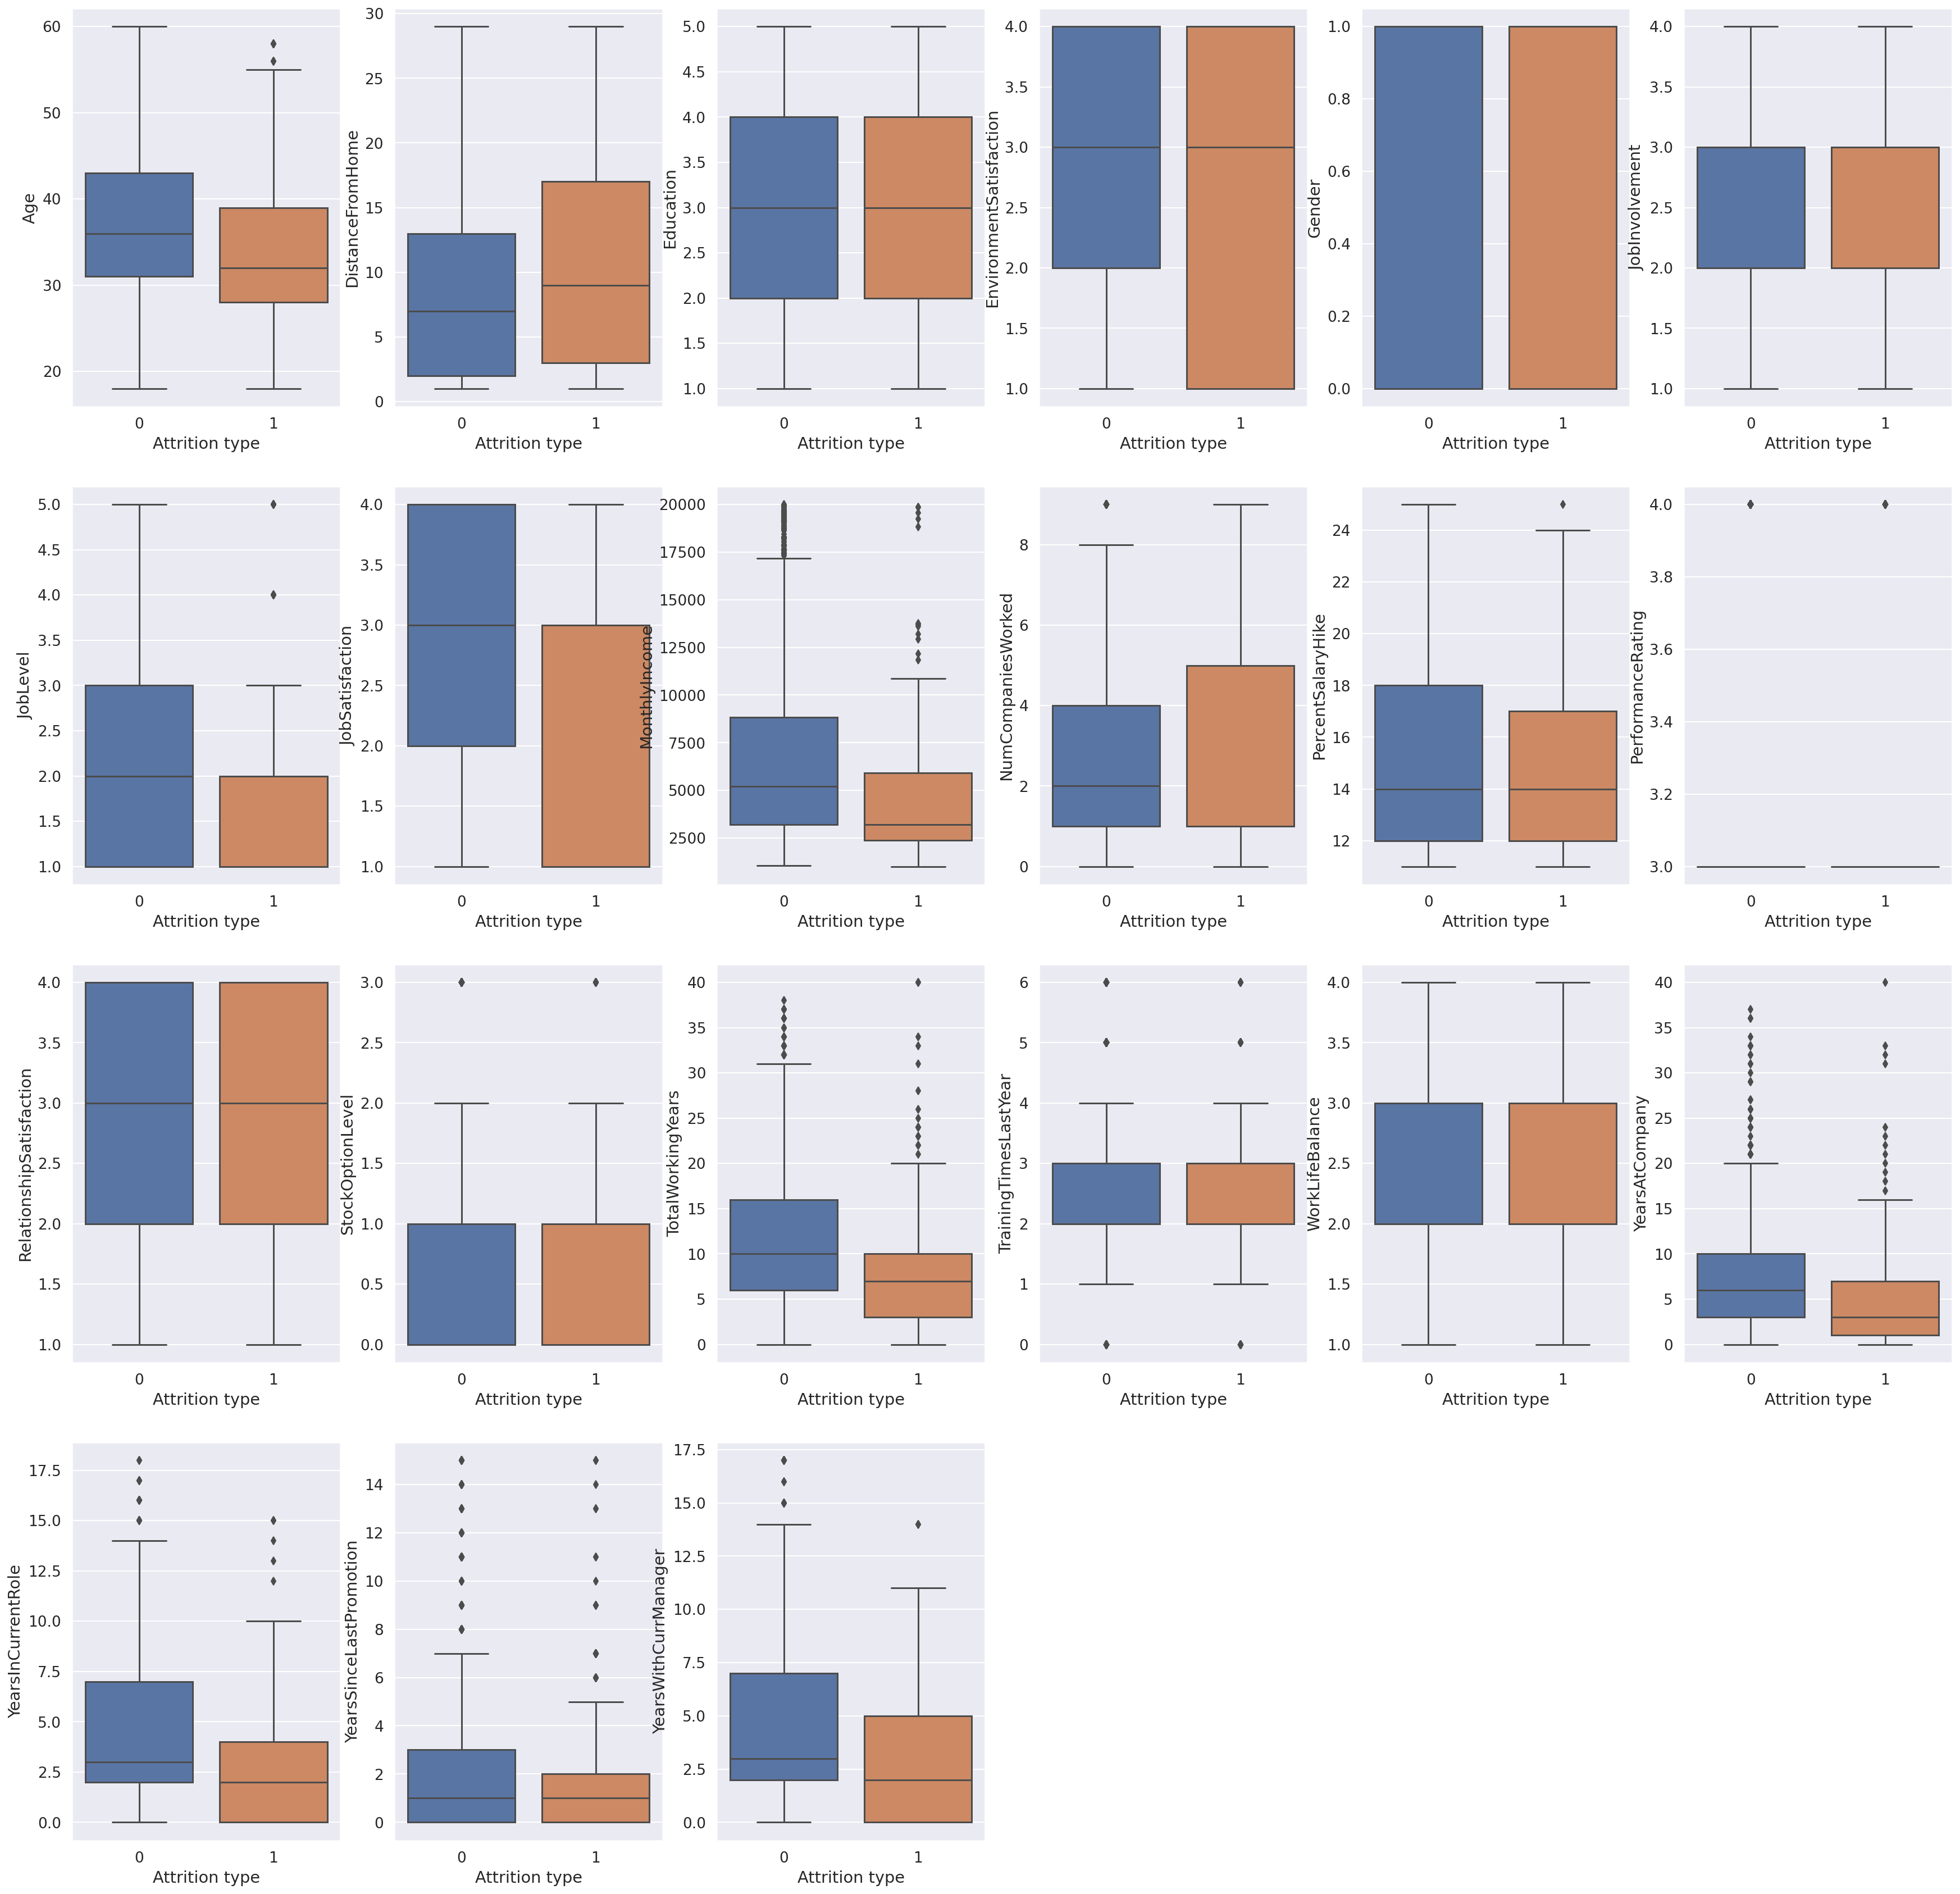

In [13]:
# Visualize the distribution of numerical features(Hue = Attrition)

numerical_col = df.columns.difference(categorical_col)
numerical_col = numerical_col.drop(['Attrition'])
print(numerical_col)

sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))
for i, column in enumerate(numerical_col, 1):
    plt.subplot(4, 6, i)
    g = sns.boxplot(x="Attrition", y=f"{column}", data=df)
    g.set_xticklabels(g.get_xticklabels())
    plt.ylabel(f'{column}')
    plt.xlabel('Attrition type')

# From the plots, we can assume that those who leave and those who don’t leave are very different in these respects: 
# Age, Distance from home, job satisfaction, job level, monthly income, total working years, years at company, years in current role, years with current manager.


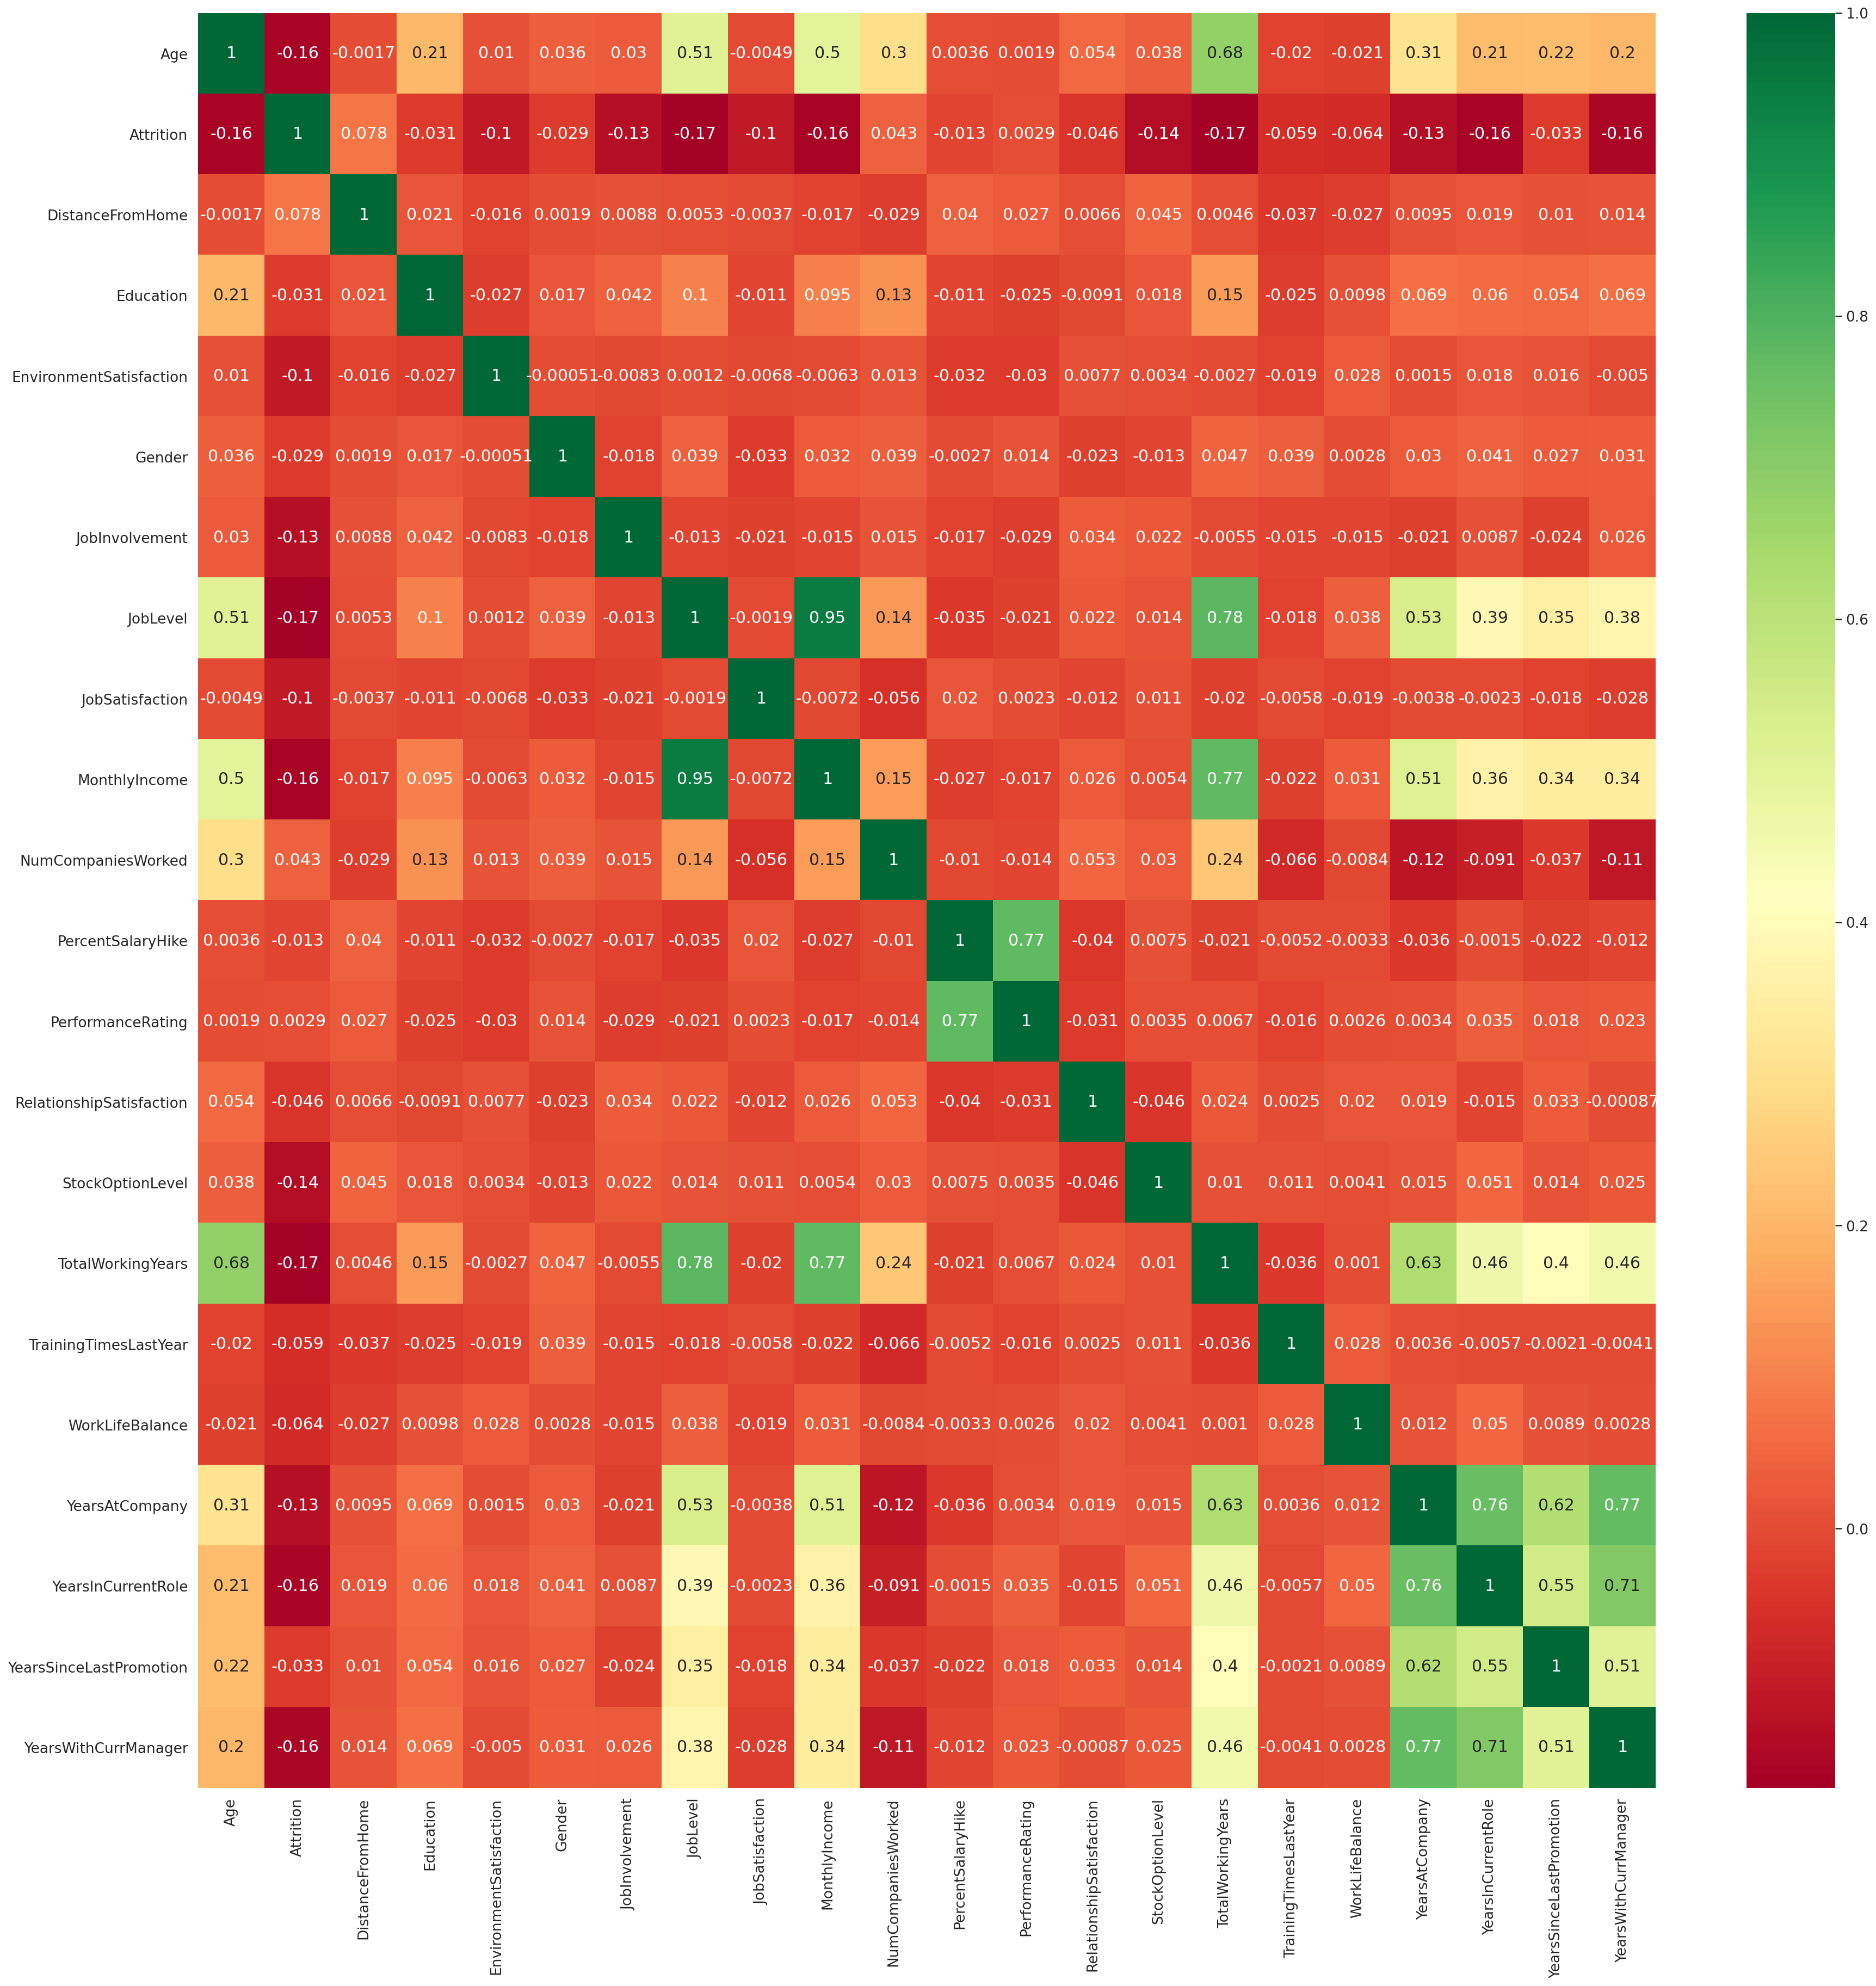

In [14]:
# use heatmap to plot correlations

plt.figure(figsize=(30,30))
f2 = sns.heatmap(df.corr(),annot=True, annot_kws={"size":15}, cmap="RdYlGn")

Findings:
1. We can see that there is no strong correlations(>0.5) between "Attrition" and other variables. 
2. For "MonthlyIncome", it's highly related to "Age", "Joblevel" and “TotalWorkingYears ”. We need to consider the confounding variables in our analysis.
3. There are strong positive relations between time-related variables, such as "YearsInCurrentRole", "YearsAtCompany",“YearsSinceLastPromotion”，“YearsWithCurrManager ”， “TotalWorkingYears ”， which means we need to care about multicollinearity if we include these variables in the regression.

In [15]:
# Correlation between "Attrition" and other features

corrmat = df.corr()["Attrition"]
corrmat 
# Although no significant correlation, "MonthlyIncome" is a variable with a relatively high degree of correlation.
# We can continue to verify our hypothesis.

Age                        -0.159205
Attrition                   1.000000
DistanceFromHome            0.077924
Education                  -0.031373
EnvironmentSatisfaction    -0.103369
Gender                     -0.029453
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
Name: Attrition, dtype: float64

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

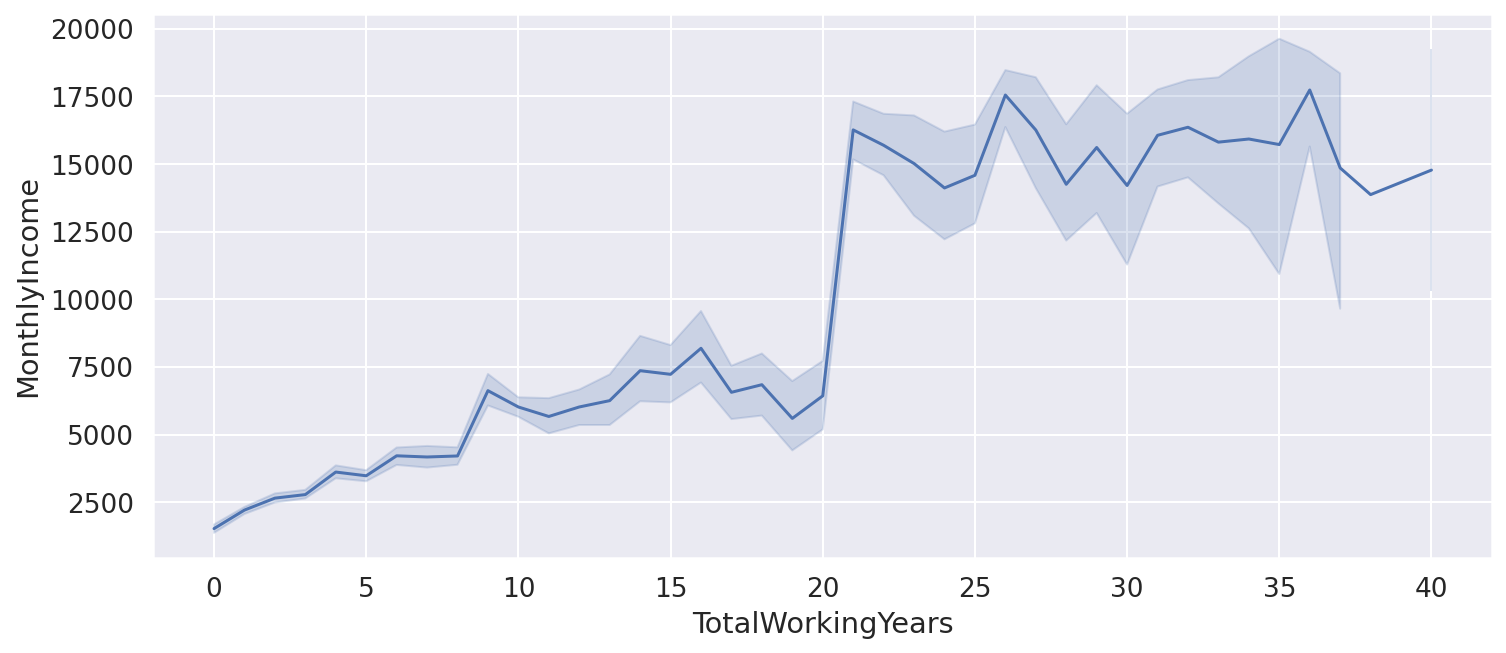

In [16]:
# Correlation between TotalWorkingYears and monthly income

sns.lineplot(x='TotalWorkingYears', y= 'MonthlyIncome', data=df) 

# There is a positive correlation between the two variables；
# Also, there is a big gap of income between people who work less than 20 years and people working more than 20 years.

<AxesSubplot:xlabel='JobInvolvement', ylabel='MonthlyIncome'>

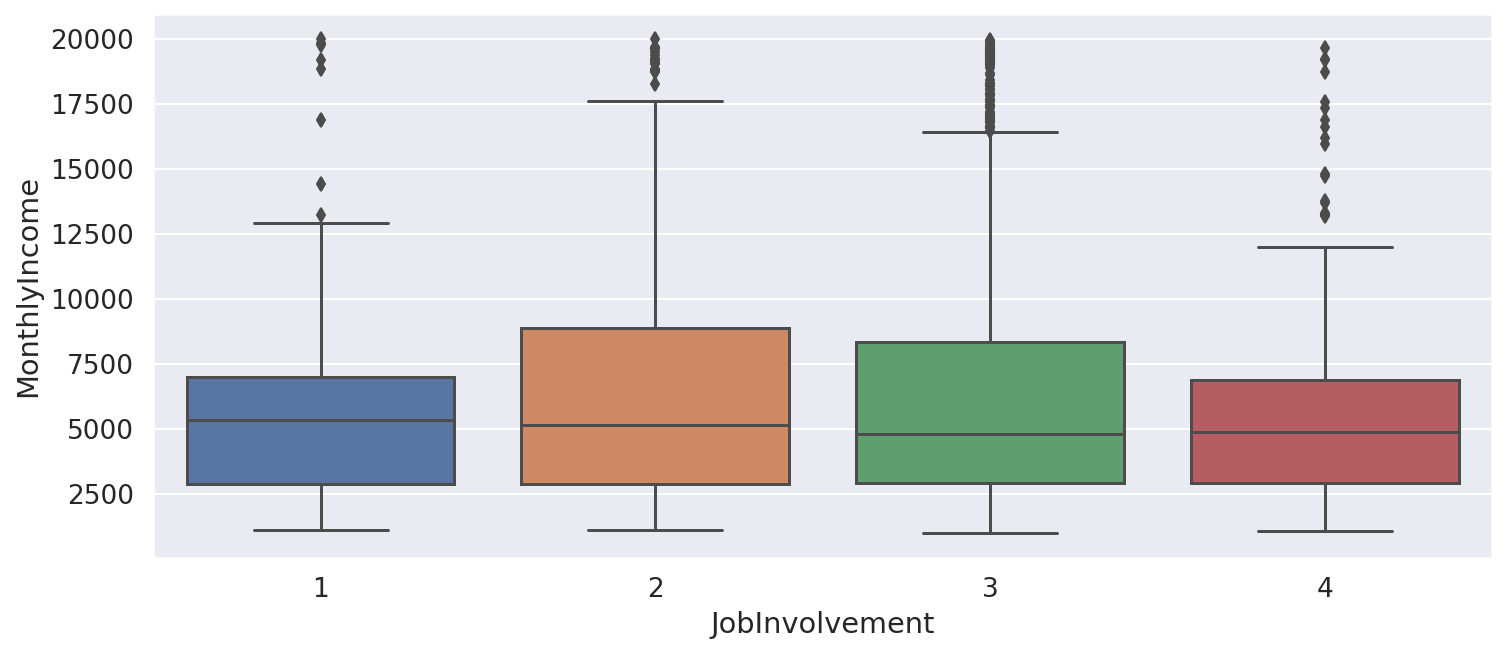

In [17]:
# Correlation between job involvement and monthly income
sns.boxplot(x='JobInvolvement',y='MonthlyIncome',data=df)

# No significant correlations between the two variables.

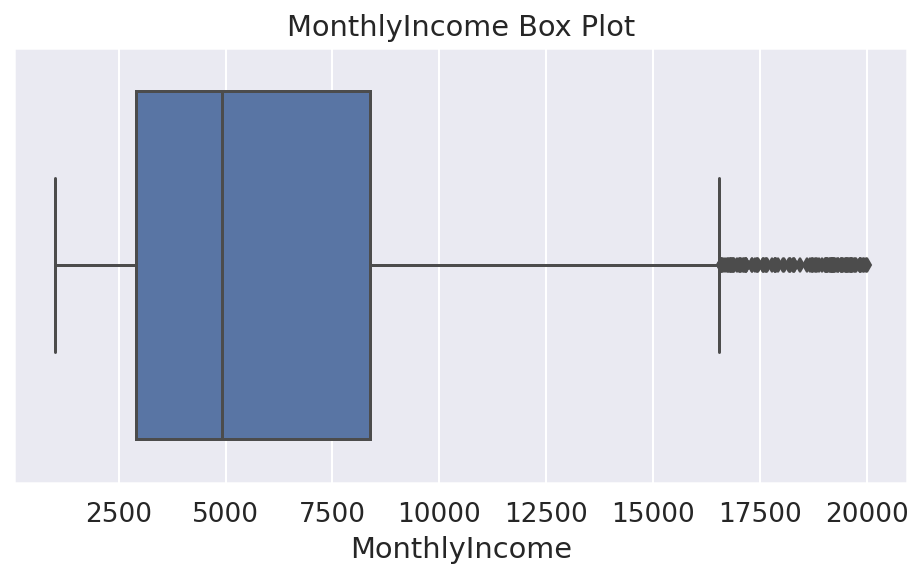

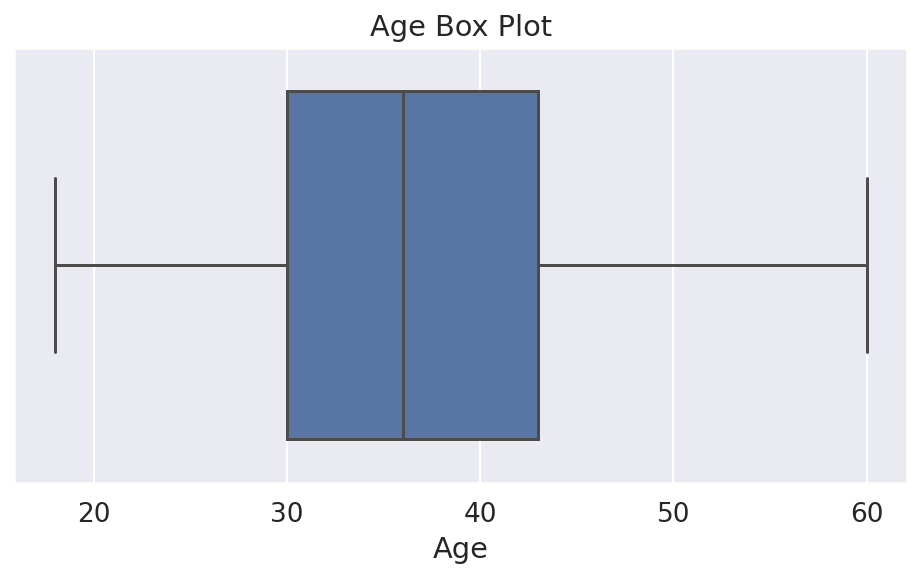

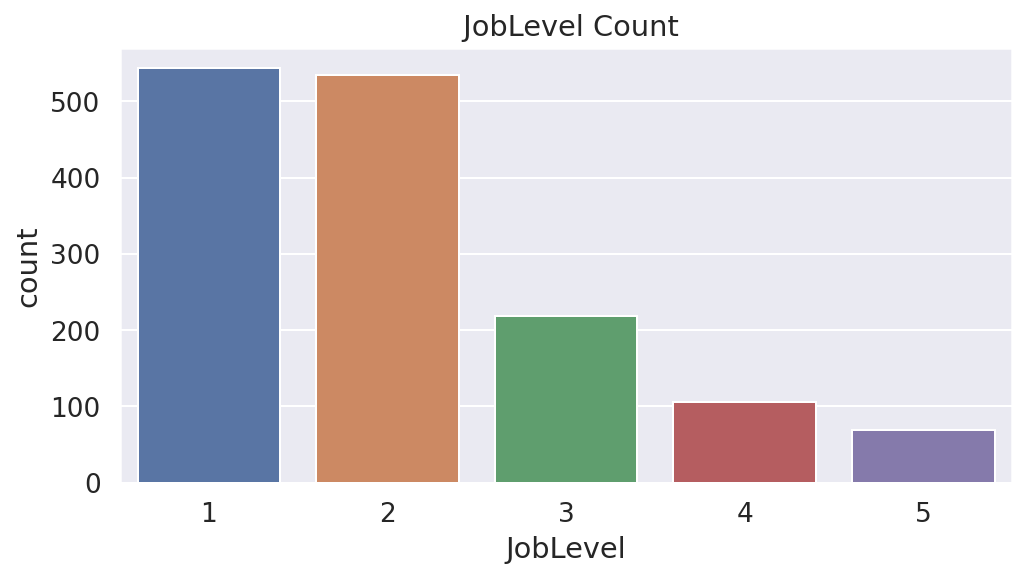

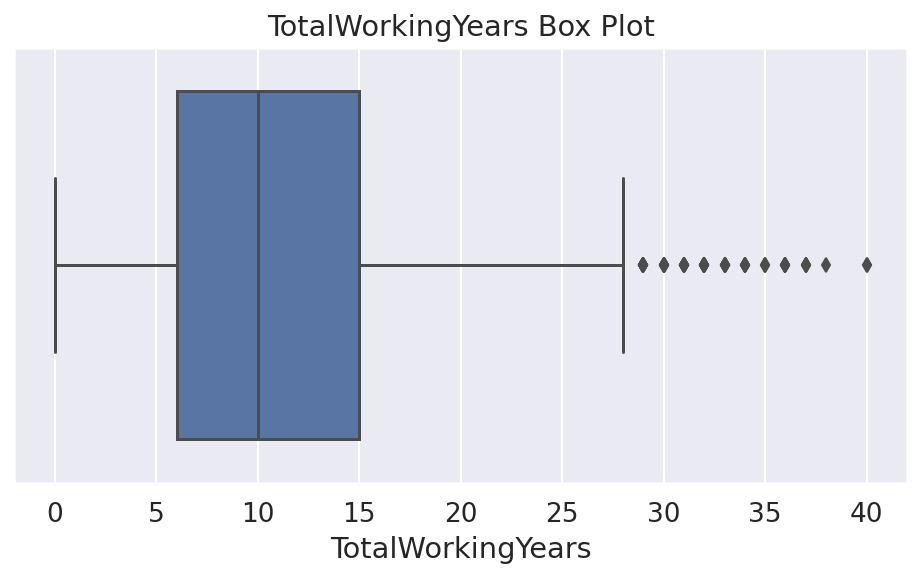

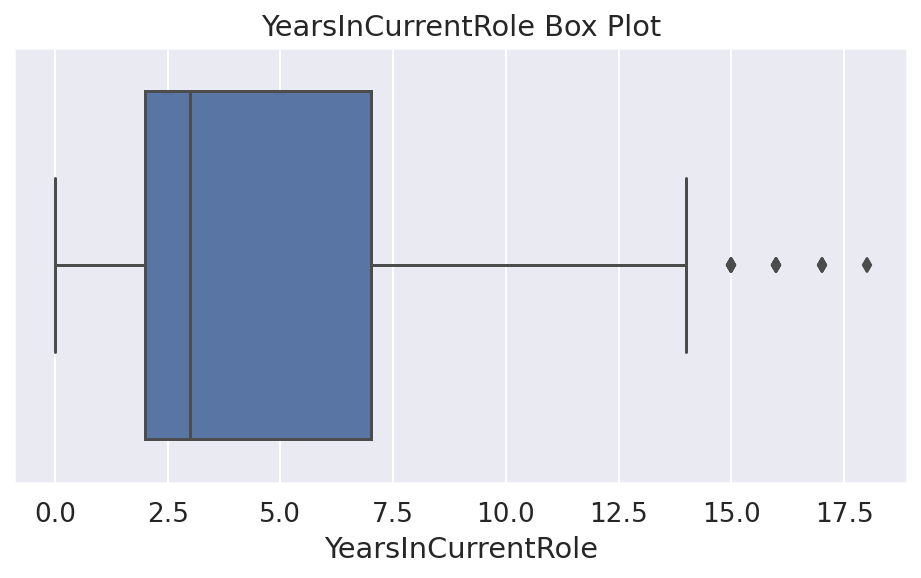

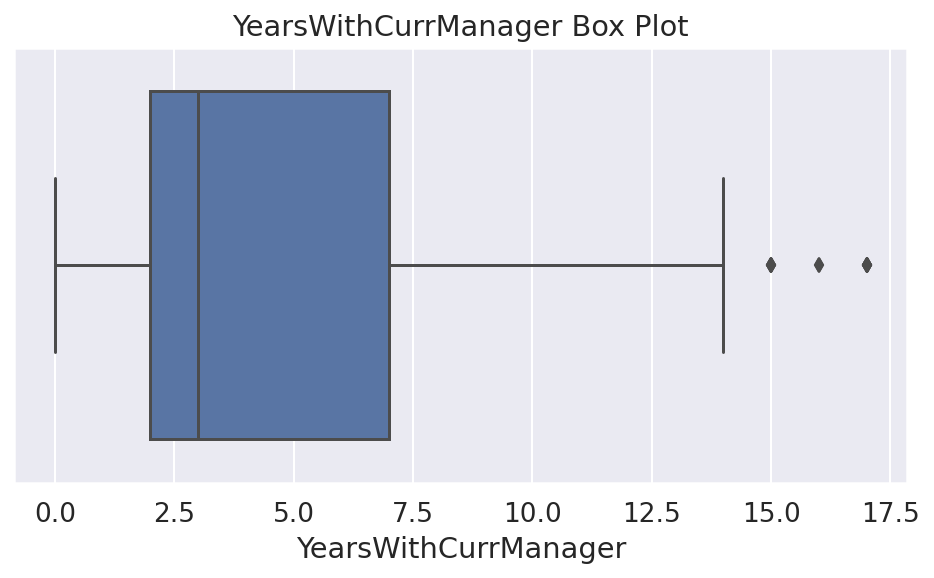

In [18]:
# Check outliers for important features(correlation >0.15 or <-0.15)
# Monthly Income
plt.figure(figsize=(8, 4))
plt.title("MonthlyIncome Box Plot")
sns.boxplot(df['MonthlyIncome'])
plt.show() 

# Age
plt.figure(figsize=(8, 4))
plt.title("Age Box Plot")
sns.boxplot(df['Age'])
plt.show() 

# Job level
plt.figure(figsize=(8, 4))
plt.title(" JobLevel Count")
sns.countplot(x='JobLevel', 
                   data=df)
plt.show() 

# Total working years
plt.figure(figsize=(8, 4))
plt.title("TotalWorkingYears Box Plot")
sns.boxplot(df['TotalWorkingYears'])
plt.show() 

# Years in current role
plt.figure(figsize=(8, 4))
plt.title("YearsInCurrentRole Box Plot")
sns.boxplot(df['YearsInCurrentRole'])
plt.show() 

# Years with current manager
plt.figure(figsize=(8, 4))
plt.title("YearsWithCurrManager Box Plot")
sns.boxplot(df['YearsWithCurrManager'])
plt.show() 


# MonthlyIncome,TotalWorkingYears,YearsInCurrentRole and YearsWithCurrManager have outliers.


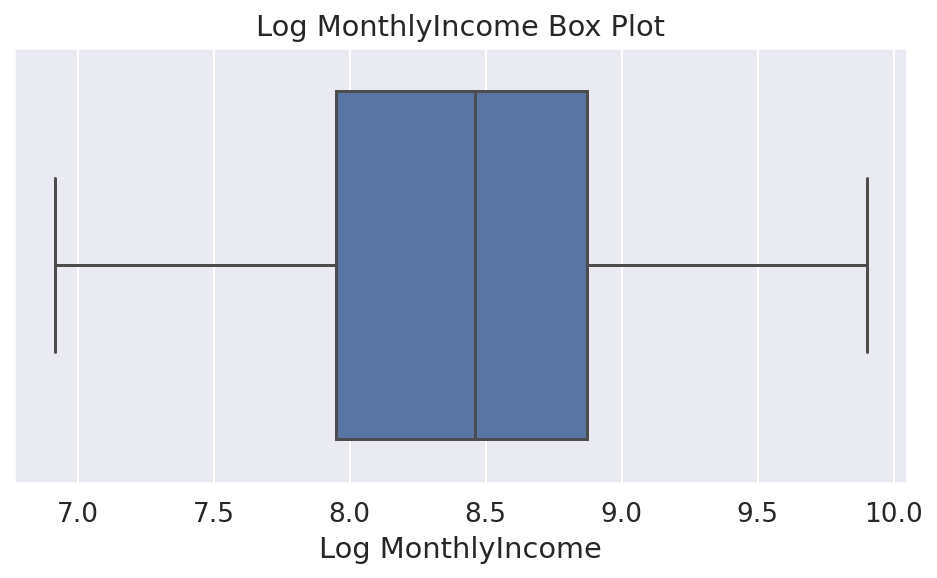

In [19]:
#Deal with outliers

# For variables with small amount of outliers, we delete those observations
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'YearsWithCurrManager')
drop_outliers(df, 'YearsInCurrentRole')
drop_outliers(df, 'TotalWorkingYears')

# For monthly salary, since there are too many outliers, we transform it with log transformation
df['Log MonthlyIncome'] = np.log(df['MonthlyIncome'])
df=df.drop(['MonthlyIncome'], axis=1)
plt.figure(figsize=(8, 4))
plt.title("Log MonthlyIncome Box Plot")
sns.boxplot(df['Log MonthlyIncome'])
plt.show() 

# There is no outlier for log monthly income now.

In [20]:
# check the correlation again
corrmat = df.corr()["Attrition"]
corrmat 

Age                        -0.154359
Attrition                   1.000000
DistanceFromHome            0.082142
Education                  -0.029600
EnvironmentSatisfaction    -0.109061
Gender                     -0.035717
JobInvolvement             -0.131402
JobLevel                   -0.163917
JobSatisfaction            -0.113258
NumCompaniesWorked          0.052744
PercentSalaryHike          -0.008385
PerformanceRating           0.010122
RelationshipSatisfaction   -0.054008
StockOptionLevel           -0.141932
TotalWorkingYears          -0.179322
TrainingTimesLastYear      -0.060605
WorkLifeBalance            -0.065664
YearsAtCompany             -0.159091
YearsInCurrentRole         -0.171194
YearsSinceLastPromotion    -0.030528
YearsWithCurrManager       -0.155256
Log MonthlyIncome          -0.193931
Name: Attrition, dtype: float64

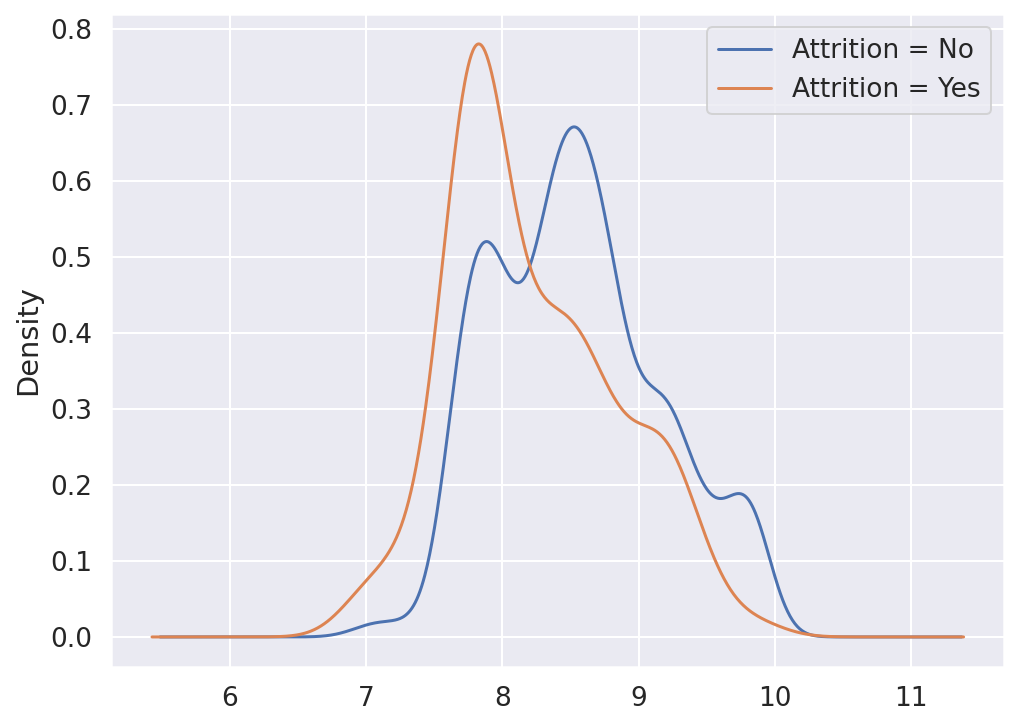

In [21]:
# Use ked plot to show the distribution of log monthly income for different attrition group
fig, ax = plt.subplots(figsize=(8,6))
bp = df.groupby('Attrition')['Log MonthlyIncome'].plot(kind='kde', ax=ax)
plt.legend(['Attrition = No', 'Attrition = Yes'])

# We can see significant difference between the logged monthly income of different attrition group.
# People who resign have lower logged monthly income and higher density.

<AxesSubplot:xlabel='Attrition', ylabel='Log MonthlyIncome'>

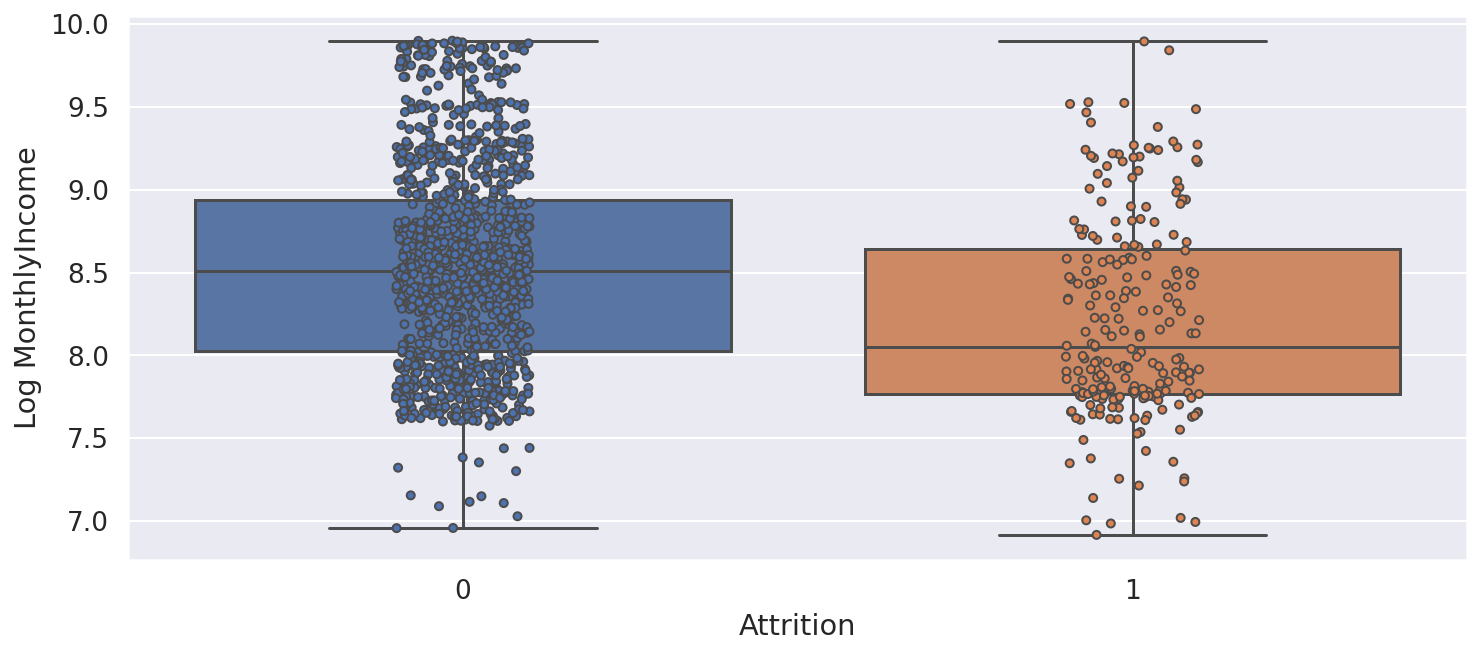

In [22]:
# Use Scattered boxplots to show the relationship between Attrition and log monthly income
sns.boxplot(x="Attrition", y="Log MonthlyIncome",  data=df)
sns.stripplot(x="Attrition", y="Log MonthlyIncome",  data=df,
              size=4, jitter=True, linewidth=1, edgecolor="gray")

# People who leave have lower median logged monthly income. The distribution of the income of the resigned group is concentrated between 25% and 75%. 

### Implementing Machine Learning Model ###

In [23]:
# Translate categorical data into dummies

# For ordinal categorical features
df['BusinessTravel'].replace({'Travel_Frequently':2, 'Travel_Rarely': 1, 'Non-Travel': 0}, inplace=True)

# For non-ordinal ones
categorical_cols = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
df_out=pd.get_dummies(df, columns=categorical_cols)


In [24]:
# Check the data again
df_out

Age  Attrition  BusinessTravel  DistanceFromHome  Education  \
0      41          1               1                 1          2   
1      49          0               2                 8          1   
2      37          1               1                 2          2   
3      33          0               2                 3          4   
4      27          0               1                 2          1   
...   ...        ...             ...               ...        ...   
1465   36          0               2                23          2   
1466   39          0               1                 6          1   
1467   27          0               1                 4          3   
1468   49          0               2                 2          3   
1469   34          0               1                 8          3   

      EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  \
0                           2       1               3         2   
1                           3       0               2         2   
2                           4       0               2         1   
3                           4       1               3         1   
4                           1       0               3         1   
...                       ...     ...             ...       ...   
1465                        3       0               4         2   
1466                        4       0               2         3   
1467                        2       0               4         2   
1468                        4       0               2         2   
1469                        2       0               4         2   

      JobSatisfaction  NumCompaniesWorked  PercentSalaryHike  \
0                   4                   8                 11   
1                   2                   1                 23   
2                   3                   6                 15   
3                   3                   1                 11   
4                   2                   9                 12   
...               ...                 ...                ...   
1465                4                   4                 17   
1466                1                   4                 15   
1467                2                   1                 20   
1468                2                   2                 14   
1469                3                   2                 12   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469         

In [25]:
# train test split
from sklearn.model_selection import train_test_split

X = df_out.drop('Attrition', axis=1)
y = df_out['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
#decision tree classifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [27]:
# model evaluation

print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print("Report : ",classification_report(y_test, y_pred))

Accuracy :  77.83132530120483
Confusion Matrix:  [[298  43]
 [ 49  25]]
Report :                precision    recall  f1-score   support

           0       0.86      0.87      0.87       341
           1       0.37      0.34      0.35        74

    accuracy                           0.78       415
   macro avg       0.61      0.61      0.61       415
weighted avg       0.77      0.78      0.77       415



In [28]:
#hyperparameter tuning

param_dist = {"max_depth":(list(range(1,10))),
              "splitter":("best", "random"),
              "min_samples_leaf": (list(range(1,20))),
              "min_samples_split":[2, 3, 4], 
              "criterion": ["gini", "entropy"]}

clf_cv = GridSearchCV(clf, param_dist, n_jobs=-1, verbose=1, cv=3)
clf_cv.fit(X_train, y_train)
best_params = clf_cv.best_params_
print(f"Best paramters: {best_params})")


Fitting 3 folds for each of 2052 candidates, totalling 6156 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 14, 'min_samples_split': 3, 'splitter': 'random'})


In [29]:
# model evaluation
dt = DecisionTreeClassifier(**best_params)
dt.fit(X_train, y_train)

y_pred_cv=dt.predict(X_test)
print ("Accuracy : ",accuracy_score(y_test,y_pred_cv)*100)
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_cv))
print("Report : ",classification_report(y_test, y_pred_cv))

Accuracy :  82.65060240963855
Confusion Matrix:  [[329  12]
 [ 60  14]]
Report :                precision    recall  f1-score   support

           0       0.85      0.96      0.90       341
           1       0.54      0.19      0.28        74

    accuracy                           0.83       415
   macro avg       0.69      0.58      0.59       415
weighted avg       0.79      0.83      0.79       415



In [30]:
# Text representation of decision tree

txtrep = tree.export_text(dt)
print(txtrep)

|--- feature_42 <= 0.65
|   |--- feature_21 <= 8.44
|   |   |--- feature_21 <= 8.01
|   |   |   |--- feature_8 <= 1.20
|   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  1.20
|   |   |   |   |--- class: 0
|   |   |--- feature_21 >  8.01
|   |   |   |--- feature_17 <= 4.94
|   |   |   |   |--- class: 0
|   |   |   |--- feature_17 >  4.94
|   |   |   |   |--- class: 0
|   |--- feature_21 >  8.44
|   |   |--- feature_13 <= 0.89
|   |   |   |--- feature_0 <= 42.54
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  42.54
|   |   |   |   |--- class: 0
|   |   |--- feature_13 >  0.89
|   |   |   |--- feature_35 <= 0.40
|   |   |   |   |--- class: 0
|   |   |   |--- feature_35 >  0.40
|   |   |   |   |--- class: 0
|--- feature_42 >  0.65
|   |--- feature_39 <= 0.96
|   |   |--- feature_7 <= 1.16
|   |   |   |--- feature_20 <= 0.61
|   |   |   |   |--- class: 1
|   |   |   |--- feature_20 >  0.61
|   |   |   |   |--- class: 0
|   |   |--- feature_7 >  1.16
|   |   |   |--- fea

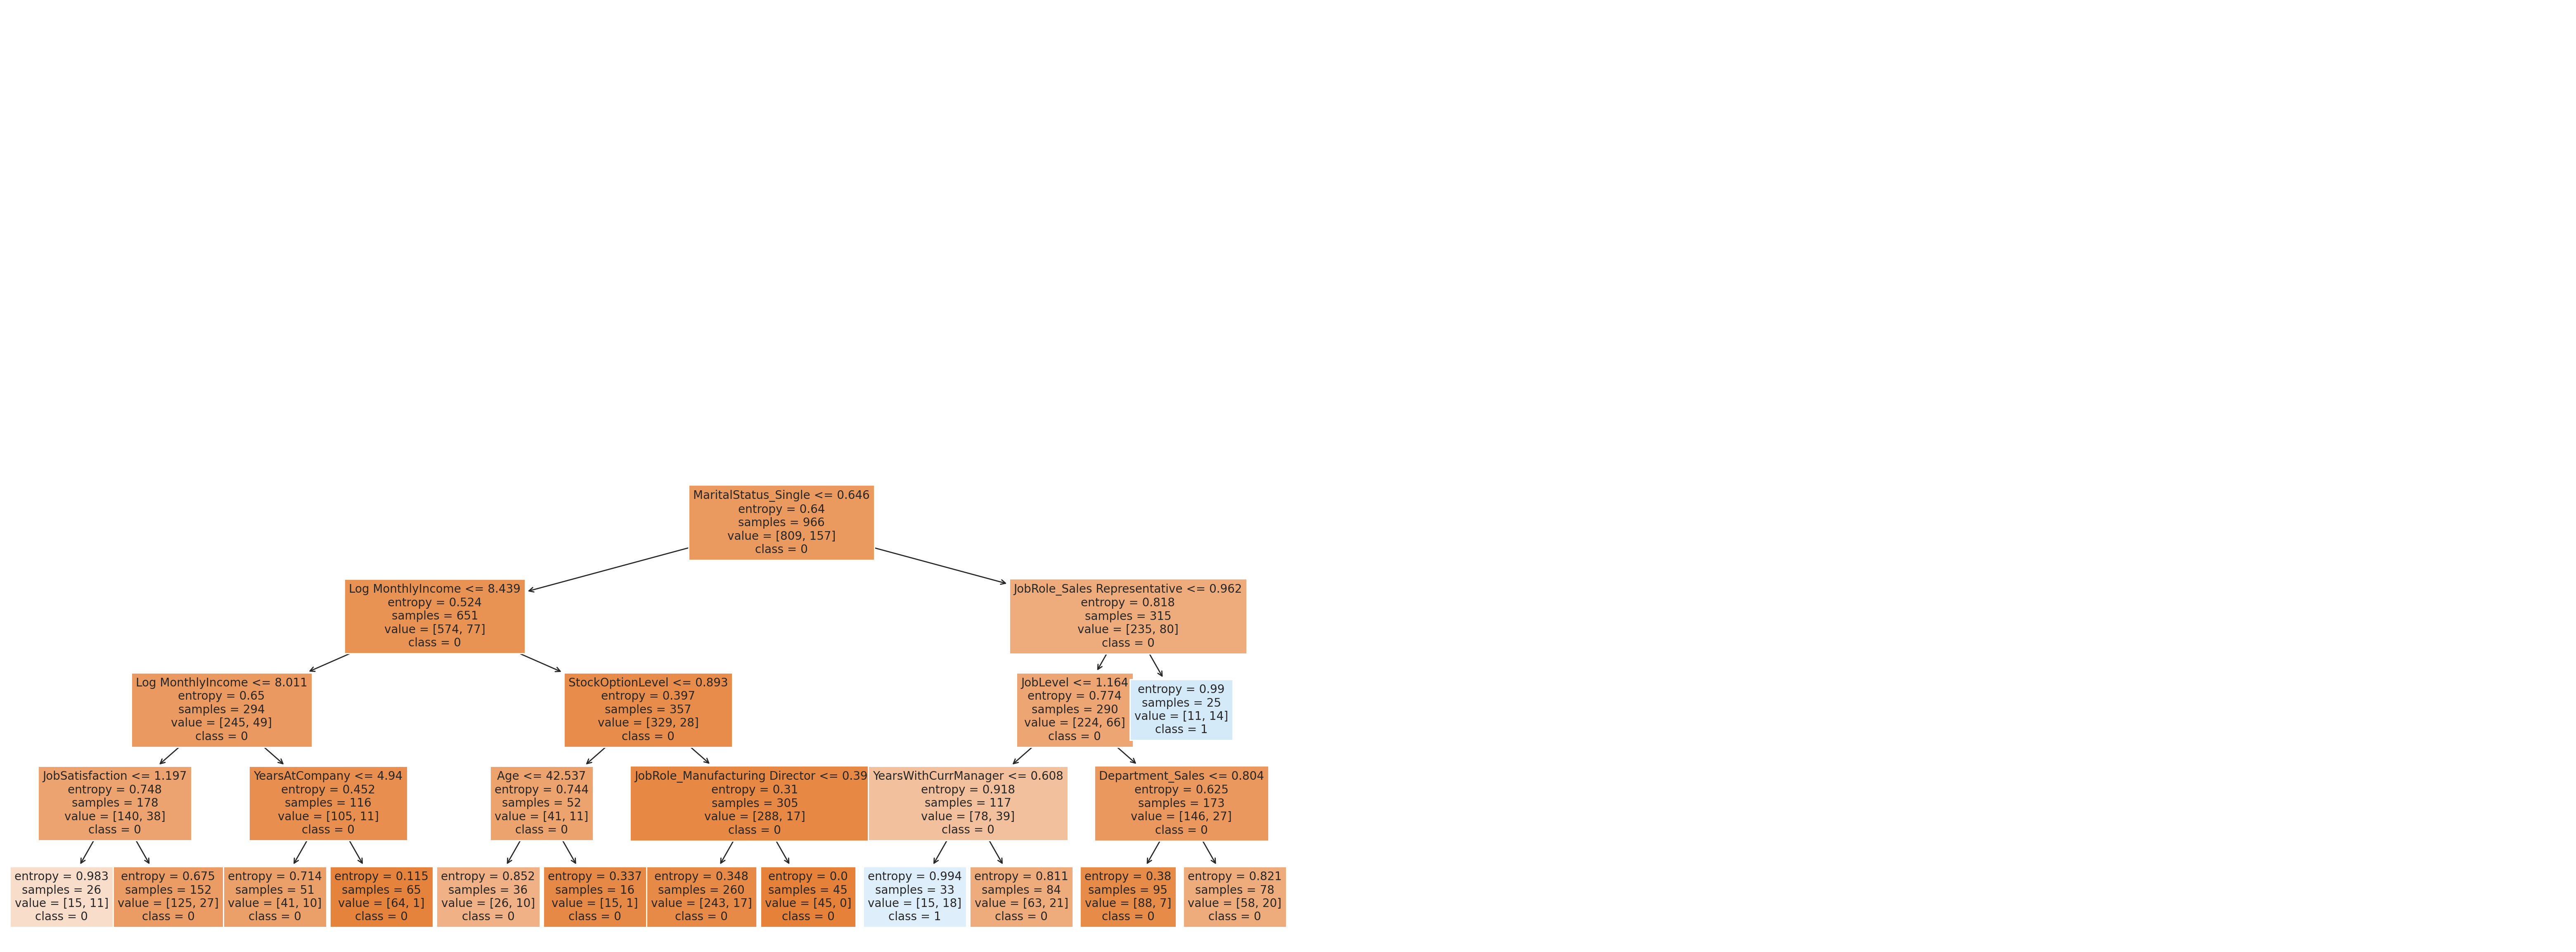

In [41]:
#Visualize decision tree

feature_names=list(df_out)
feature_names.remove('Attrition')

plt.figure(figsize=(40,15),dpi=100)
_=tree.plot_tree(dt, 
         feature_names=feature_names,
         class_names=['0','1'],
         filled=True,fontsize=10)

# The figure can be zoomed in. 
# The max depth of the tree is 4. 
# We can see the root is 'MaritalStatus_single'. Then the first two nodes are Log MonthlyIncome and JobRole_salerepresentative. 

In [32]:
# Calculate feature importance 

feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances

importance
MaritalStatus_Single                 0.208929
Log MonthlyIncome                    0.150433
JobLevel                             0.094211
YearsAtCompany                       0.091515
JobRole_Sales Representative         0.089084
StockOptionLevel                     0.087701
Department_Sales                     0.084838
YearsWithCurrManager                 0.069003
JobSatisfaction                      0.053429
JobRole_Manufacturing Director       0.042935
Age                                  0.027922
MaritalStatus_Married                0.000000
EducationField_Marketing             0.000000
EducationField_Medical               0.000000
EducationField_Other                 0.000000
EducationField_Technical Degree      0.000000
JobRole_Healthcare Representative    0.000000
MaritalStatus_Divorced               0.000000
JobRole_Laboratory Technician        0.000000
JobRole_Manager                      0.000000
EducationField_Life Sciences         0.000000
JobRole_Research Director            0.000000
JobRole_Research Scientist           0.000000
JobRole_Sales Executive              0.000000
JobRole_Human Resources              0.000000
DistanceFromHome                     0.000000
EducationField_Human Resources       0.000000
RelationshipSatisfaction             0.000000
EnvironmentSatisfaction              0.000000
Gender                               0.000000
JobInvolvement                       0.000000
NumCompaniesWorked                   0.000000
PercentSalaryHike                    0.000000
PerformanceRating                    0.000000
TotalWorkingYears                    0.000000
Department_Research & Development    0.000000
TrainingTimesLastYear                0.000000
WorkLifeBalance                      0.000000
YearsInCurrentRole                   0.000000
YearsSinceLastPromotion              0.000000
BusinessTravel                       0.000000
Education                            0.000000
Department_Human Resources           0.000000

<BarContainer object of 43 artists>

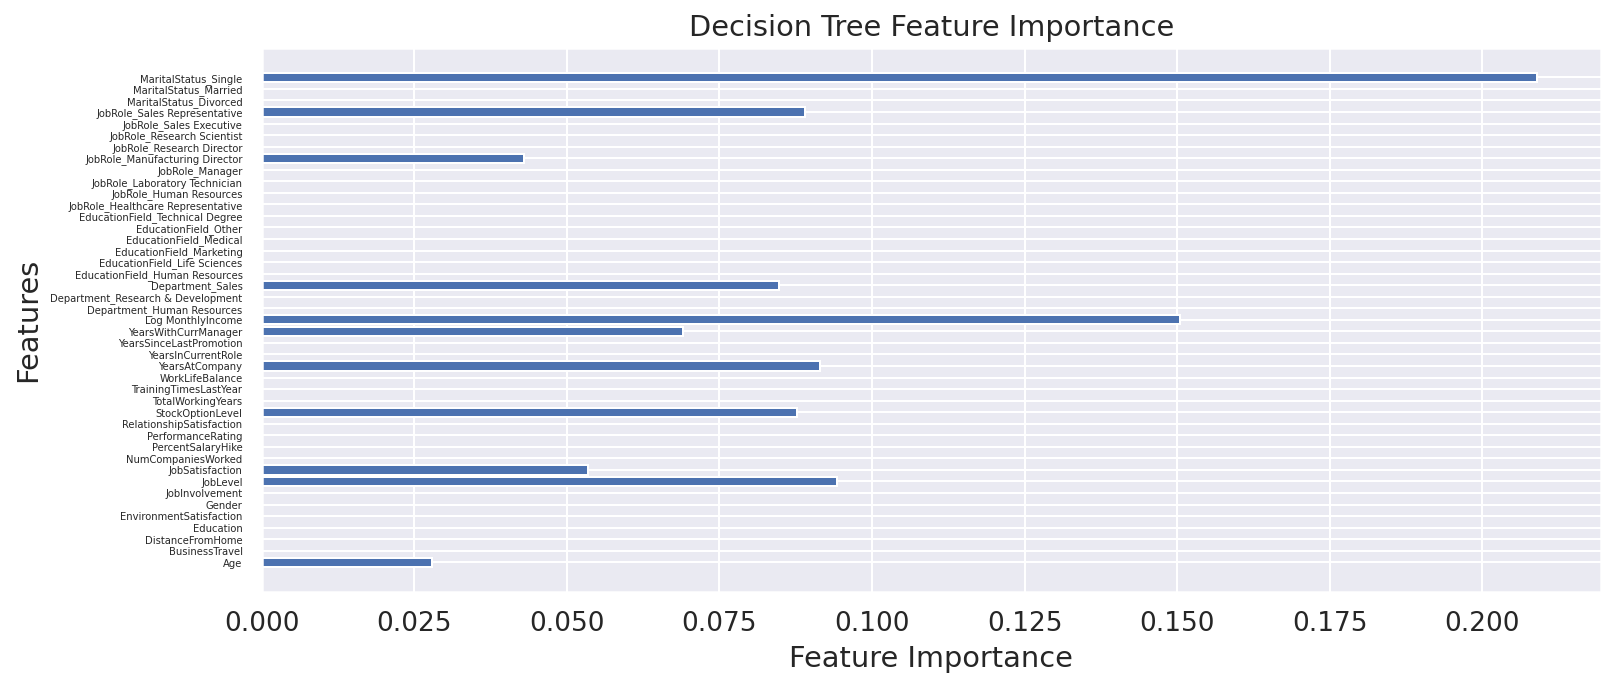

In [33]:
#Visualize the importance of features

plt.yticks(fontsize=5)
plt.title('Decision Tree Feature Importance')
plt.ylabel('Features',rotation=90)
plt.xlabel('Feature Importance',rotation=0)
plt.barh(X.columns, dt.feature_importances_)

# The most important feature is MaritalStatus_Single. 
# Among "Log MonthlyIncome", "TotalWorkingYears" and "JobInvolvement", "Log MonthlyIncome" is most important.


# Ethics & Privacy

Our dataset was obtained from Kaggle, which is a reliable source meant to offer unbiased and public data for research purposes. We ensured that we did not take any private data and that we abided by any restrictions set forth by Kaggle and the creators of the dataset, IBM. No identifying features of individuals or groups of people were included in the dataset. There was no immediate or innately unethical drawbacks in our intended use of this dataset and the processes used in our analysis. 

The dataset used in our project analysis consists of a multitude of essential factors regarding employee attrition. Initially, we were drawn to this dataset because of its extensive categories and entries from a credible source, IBM. However, after concluding our analysis, it was discovered that the origin of this dataset was misleading. It was promoted as IBM HR Analytics, but is then briefly claimed to be a "fictional data set created by IBM data scientists". There is no further elaboration on this, so it is unclear whether the dataset is entirely authentic or reliable. Although the extent to which the results of our analysis on this dataset may be applied to real-world conclusions, there is public support in the dataset's usefulness in testing for employee attrition from given employee data. We acknowledge the lack of reliability in the data's real-world applicability in our conclusions by allowing room for confounding variables and focusing on the implications of our generated predictions. In terms of ethical concerns, it would be irresponsible to claim that our findings are fully applicable to the real world because we have identified these gray areas within the dataset. 




# Conclusion & Discussion

In conclusion, we built a decision tree model with an accuracy as 82.65%, which demontrate its good prediction quality. Also, we verified the second hypothesis that among job involvement, salary, and total working years, salary is the main driver of employee attrition.

However, from our EDA, we noticed that there exist high correlations between features. Although this will not affect the prediction accuracy of our model, it may lead to deviations in the calculation of feature importance. Because if features A, B are heavily correlated, no /little information can be gained from splitting on B after having split on A. This may explain why the importance of total working years is so low. Intuitively, total working years is highly correlated with monthly income, job level and years in the company, and these 3 variables have served as nodes. Considering this, although the feature impoartance we got shows that salary is the most important feature among the three ones in our hypothesis. Further work needs to be done to explore the correlations between them and other features. However, we don't have enough ability to do this yet.

# Team Contributions

Noelle Sumner: Participated in the brainstorming of project topics.

Jalani Bowman：Finished the first draft of the project proposal; Participated in the data analysis part.

Yajie Li： Finished the overview, data cleaning, EDA, data visualization and conclusion parts; participated in the data analysis part.

Jazmine Wilmore: Finished the video.

Isabella Zendejas: Finished the background & prior work, research question and Ethics & Privacy parts.